# Example: Gaussian Copula
This notebook demonstrates how to use a Gaussian copula to model a simple dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copulas.multivariate import GaussianMultivariate

We'll start by generating a simple dataset with two clusters of values.

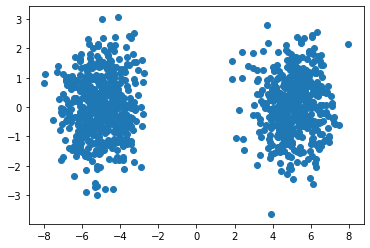

In [2]:
mask = 10*np.random.randint(0, 2, size=1000)-5
x = mask + np.random.normal(size=1000)
y = np.random.normal(size=1000)
dataset = pd.DataFrame({"x": x, "y": y})
plt.scatter(dataset["x"], dataset["y"]);

We can fit a Gaussian copula with Gaussian marginals. Note that the synthetic dataset constructed from this copula isn't particularly compelling.

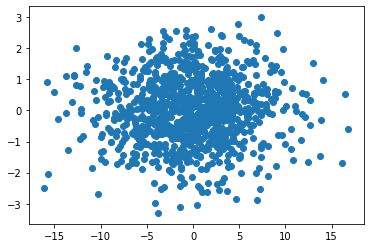

In [3]:
model = GaussianMultivariate(distribution='copulas.univariate.GaussianUnivariate')
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);

However, if we estimate the marginals with a Gaussian KDE instead, we are able to recover the two clusters successfully.

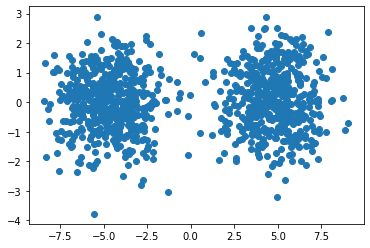

In [4]:
model = GaussianMultivariate(distribution='copulas.univariate.GaussianKDE')
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);